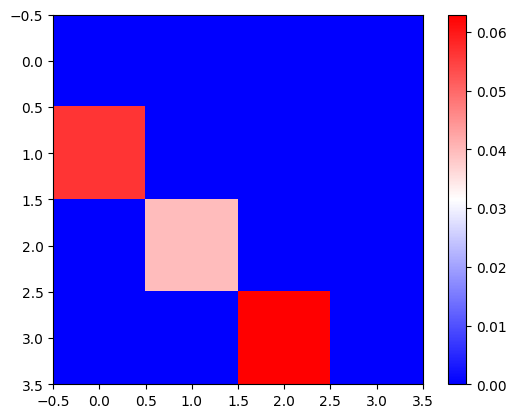

In [43]:
from simulate_data import Simulation
from beta_generators import gen_static_beta,gen_step_beta
import numpy as np

number_of_locations = 4
n = number_of_locations
days = 150

"""
The simulation object generates model parameters on instantiation.
Simulation has methods for visualizing various model parameters.
"""
simulation = Simulation(num_locations = n, beta_gen= gen_static_beta, days = days,seed=1)
simulation.plot_mov_ratio()

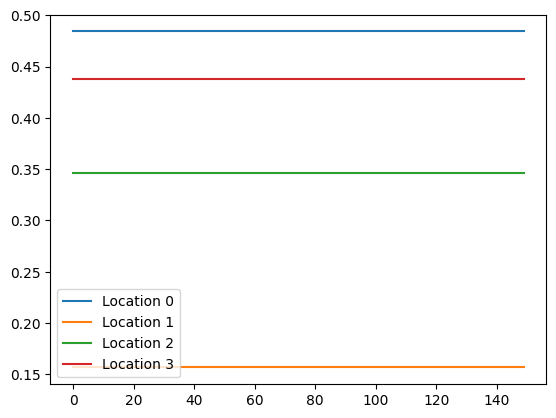

In [44]:
simulation.plot_real_beta()

In [45]:
from tau_leap import SIR_tau_leap
simulation.run_sir_model(SIR_tau_leap)

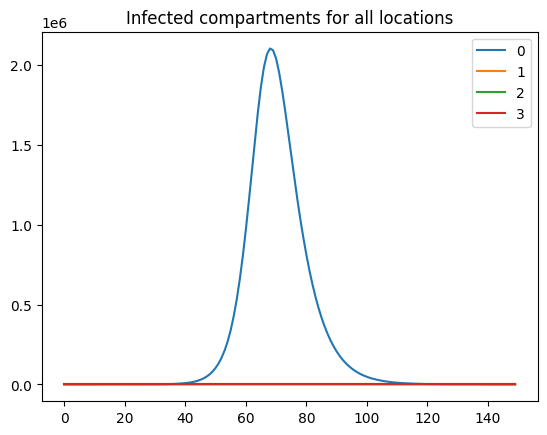

In [46]:
simulation.plot_infected()

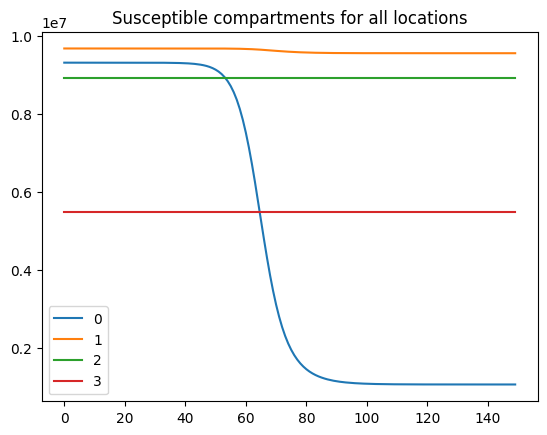

In [47]:
simulation.plot_susceptible()

Let's run both filters (log and lin) with identical inputs. 
Then, we will compare the weights and resampling indices. 

In [48]:
from particle_filter import ParticleFilterParams

pf_params = ParticleFilterParams(
    num_particles=100,
    num_locations=simulation.num_locations,
    population=simulation.population,
    movement=simulation.movement,
    mov_ratio=simulation.mov_ratio,
    results=simulation.results,
)

In [49]:
from particle_filter import run_log_particle_filter, run_linear_particle_filter

lin_output = run_linear_particle_filter(pf_params)
log_output = run_log_particle_filter(pf_params)

Iteration: 1 
Iteration: 2 
Iteration: 3 
Iteration: 4 
Iteration: 5 
Iteration: 6 
Iteration: 7 
Iteration: 8 
Iteration: 9 
Iteration: 10 
Iteration: 11 
Iteration: 12 
Iteration: 13 
Iteration: 14 
Iteration: 15 
Iteration: 16 
Iteration: 17 
Iteration: 18 
Iteration: 19 
Iteration: 20 
Iteration: 21 
Iteration: 22 
Iteration: 23 
Iteration: 24 
Iteration: 25 
Iteration: 26 
Iteration: 27 
Iteration: 28 
Iteration: 29 
Iteration: 30 
Iteration: 31 
Iteration: 32 
Iteration: 33 
Iteration: 34 
Iteration: 35 
Iteration: 36 
Iteration: 37 
Iteration: 38 
Iteration: 39 
Iteration: 40 
Iteration: 41 
Iteration: 42 
Iteration: 43 
Iteration: 44 
Iteration: 45 
Iteration: 46 
Iteration: 47 
Iteration: 48 
Iteration: 49 
Iteration: 50 
Iteration: 51 
Iteration: 52 
Iteration: 53 
Iteration: 54 
Iteration: 55 
Iteration: 56 
Iteration: 57 
Iteration: 58 
Iteration: 59 
Iteration: 60 
Iteration: 61 
Iteration: 62 
Iteration: 63 
Iteration: 64 
Iteration: 65 
Iteration: 66 
Iteration: 67 
Iter

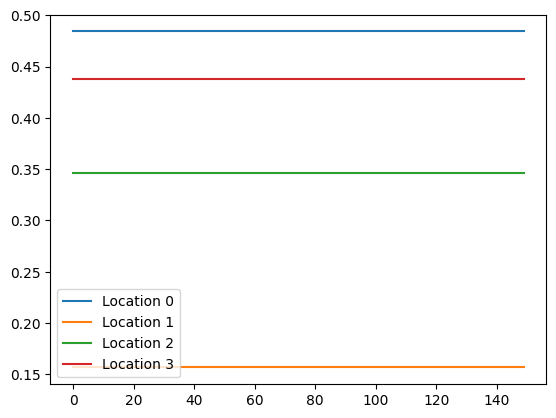

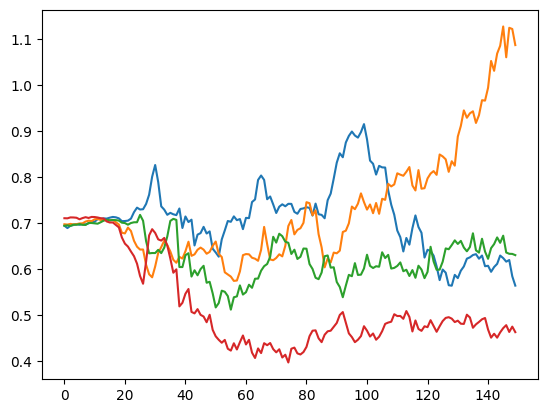

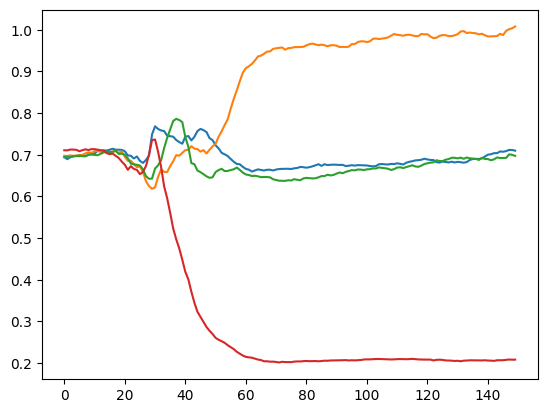

In [50]:
import matplotlib.pyplot as plt

simulation.plot_real_beta()
plt.plot(lin_output.beta_post)
plt.show()
plt.plot(log_output.beta_post)

In [51]:
"""Comparing the Resampling Indices"""

lin_indices = lin_output.get_all_resampling_indices_as_array()
log_indices = log_output.get_all_resampling_indices_as_array()

def check_equal_at_time_step(a, b):
    return np.array_equal(a, b)

resample_comparison_results = list(map(check_equal_at_time_step, lin_indices, 
                               log_indices))

In [52]:
print('Comparison Results per Time Step. \n`True` indicates that the '
      'resampling '
      'indices were identical at that time step'
      ':\n\n', resample_comparison_results)

Comparison Results per Time Step. 
`True` indicates that the resampling indices were identical at that time step:

 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

It appears that the resampling starts off equal, but something causes them to 
diverge around time step 11. We could still be missing some un-seeded 
randomness somewhere (I don't believe this is the case), or this could be due
 to numerical imprecision, 
where the log and 
lin weights are slowly drifitng away from each other. 

In [53]:
"""Comparing the Weights"""

lin_weights = lin_output.get_all_weights_as_array()
log_weights = log_output.get_all_weights_as_array()

def convert_log_to_linear(weights):
    return np.exp(weights)

def compare_weights_at_time_step(a, b, atol=1e-8, rtol=1e-5):
    is_close = np.allclose(a, b, atol=atol, rtol=rtol)
    difference = a - b
    return is_close, difference

# Convert log weights to linear domain
log_weights_linear = convert_log_to_linear(log_weights)

# Compare each sub-array of lin_weights and log_weights_linear 
comparison_results = [
    compare_weights_at_time_step(lin_weights[i], log_weights_linear[i])
    for i in range(len(lin_weights))
]

# Extract close results and differences
close_results = [is_close for is_close, _ in comparison_results]
differences = [diff for _, diff in comparison_results]

In [54]:
print("Comparison Results:\n", close_results)

Comparison Results:
 [True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

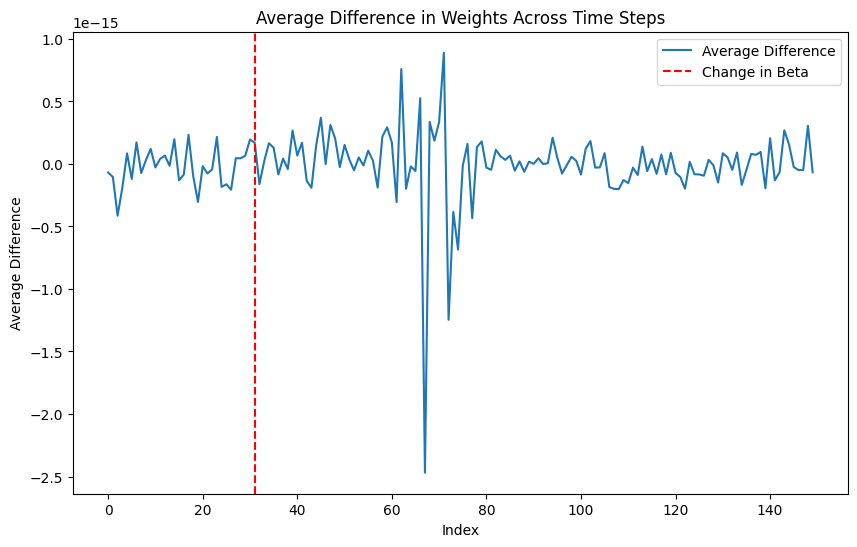

In [55]:
# Combine differences into a single array for averaging
combined_differences = np.vstack(differences)

# Calculate the average difference
average_difference = np.mean(combined_differences, axis=1)

# Plot the average difference
plt.figure(figsize=(10, 6))
plt.plot(average_difference, label='Average Difference')
plt.xlabel('Index')
plt.axvline(x=31, color='r', linestyle='--', label='Change in Beta')
plt.ylabel('Average Difference')
plt.title('Average Difference in Weights Across Time Steps')
plt.legend()
plt.show()

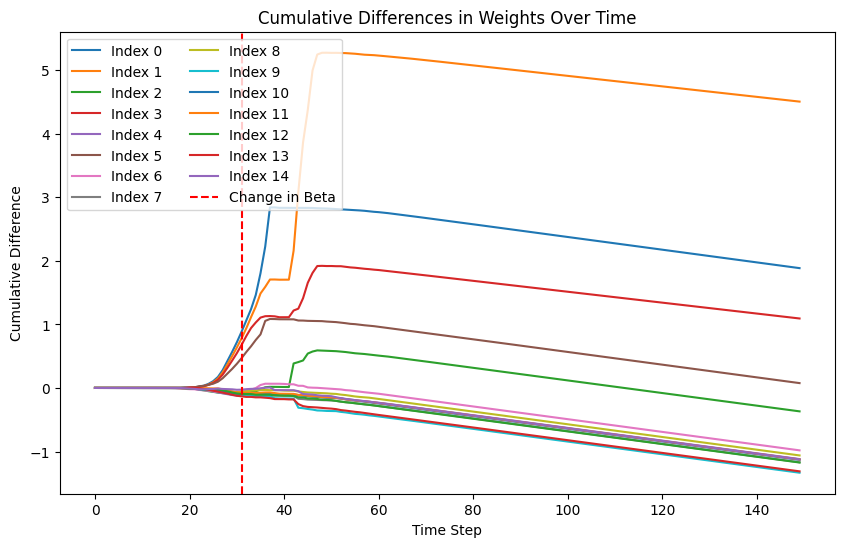

In [56]:
# Calculate the cumulative differences over time
cumulative_differences = np.cumsum(combined_differences, axis=0)

# Plot the cumulative differences for the first few particles/indices
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.plot(cumulative_differences[:, i], label=f'Index {i}')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Difference')
plt.axvline(x=31, color='r', linestyle='--', label='Change in Beta')
plt.title('Cumulative Differences in Weights Over Time')
plt.legend(loc='upper left', ncol=2)
plt.show()

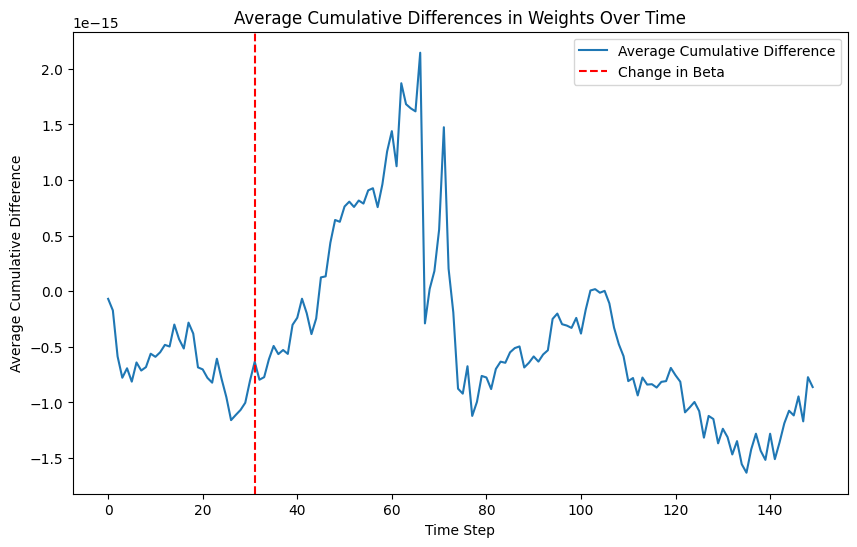

In [57]:
# Calculate the average cumulative difference across all indices
average_cumulative_difference = np.mean(cumulative_differences, axis=1)

# Plot the average cumulative difference
plt.figure(figsize=(10, 6))
plt.plot(average_cumulative_difference, label='Average Cumulative Difference')
plt.xlabel('Time Step')
plt.ylabel('Average Cumulative Difference')
plt.axvline(x=31, color='r', linestyle='--', label='Change in Beta')
plt.title('Average Cumulative Differences in Weights Over Time')
plt.legend()
plt.show()